In [58]:
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
data = pd.read_csv('Downloads/india-news-headlines.csv')
data.head()
data = data[:100000]

In [60]:
import nltk
nltk.downloader.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shreeyash\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [61]:
sia = SIA()
results = []

for line in data['headline_text']:
    pol_score = sia.polarity_scores(line)
    pol_score['headline'] = line
    results.append(pol_score)

print(results[:3])
df = pd.DataFrame.from_records(results)
df.head()

[{'neg': 0.23, 'neu': 0.473, 'pos': 0.297, 'compound': -0.0, 'headline': 'win over cena satisfying but defeating undertaker bigger roman reigns'}, {'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'compound': 0.2924, 'headline': 'Status quo will not be disturbed at Ayodhya; says Vajpayee'}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'headline': 'Fissures in Hurriyat over Pak visit'}]


,neg,neu,pos,compound,headline
0,0.230,0.473,0.297,-0.0000,win over cena satisfying but defeating underta...
1,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...
2,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit
3,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?
4,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa


In [62]:
df['label'] = 0
df.loc[df['compound'] > 0.01, 'label'] = 1
df.loc[df['compound'] < -0.01, 'label'] = -1
df.head()

,neg,neu,pos,compound,headline,label
0,0.230,0.473,0.297,-0.0000,win over cena satisfying but defeating underta...,0
1,0.000,0.805,0.195,0.2924,Status quo will not be disturbed at Ayodhya; s...,1
2,0.000,1.000,0.000,0.0000,Fissures in Hurriyat over Pak visit,0
3,0.322,0.678,0.000,-0.2263,America's unwanted heading for India?,-1
4,0.000,1.000,0.000,0.0000,For bigwigs; it is destination Goa,0


In [63]:
df2 = df[['headline', 'label']]
df2.to_csv('reddit_headlines_labels.csv', mode='a', encoding='utf-8', index=False)

In [64]:
print("Positive headlines:\n")
print(list(df[df['label'] == 1].headline)[:5])


print("\nNegative headlines:\n")
print(list(df[df['label'] == -1].headline)[:5])

Positive headlines:

['Status quo will not be disturbed at Ayodhya; says Vajpayee', 'Extra buses to clear tourist traffic', "Move to stop freedom fighters' pension flayed", "Will Qureshi's return really help the govt?", 'Jaitley firm on legal reforms']

Negative headlines:

["America's unwanted heading for India?", "Parivar dismisses PM's warning", 'NCW to focus on violence against women', "America's unwanted heading for India?", "America's unwanted heading for India?"]


In [65]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100)

 0    53996
-1    26483
 1    19521
Name: label, dtype: int64
 0    53.996
-1    26.483
 1    19.521
Name: label, dtype: float64


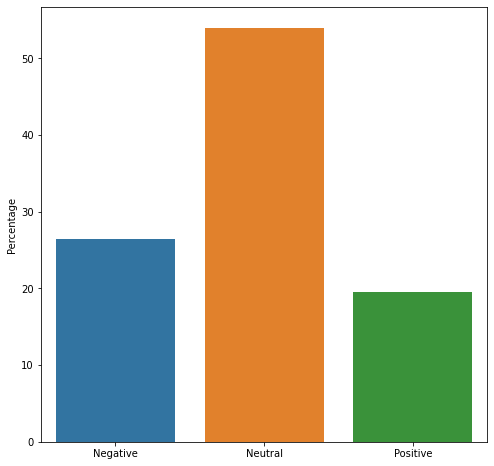

In [66]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

#### The large number of neutral headlines is due to:
We used general lexicon to categorize political news. The more correct way is to use a political-specific lexicon, but for that we would either need a human to manually label data, or we would need to find a custom lexicon already made.